<a href="https://colab.research.google.com/github/guilhermelaviola/CybersecurityProblemSolvingWithDataScience/blob/main/Class04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Threat Data Analysis**
Threat data analysis is a critical area of cybersecurity that applies data science and machine learning techniques to collect, preprocess, explore, and analyze security-related data in order to detect, understand, and respond to cyber threats. It involves cleaning and transforming raw data, performing exploratory data analysis (EDA) to identify patterns and anomalies, applying statistical and machine learning methods for anomaly detection and classification, and analyzing time series to uncover trends and suspicious behaviors. By continuously leveraging indicators of compromise (IoCs) and advanced analytics, security analysts can automate threat detection, gain actionable insights, and strengthen an organization's overall security posture.

In [1]:
# Importing all the necessary libraries and resources:
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

## **Example: Anomaly detection on network traffic data**
This example simulates network traffic data and applies an Isolation Forest, a common unsupervised machine learning algorithm, to detect anomalous behavior that could indicate a potential cyber threat.

In [3]:
# Example dataset: network traffic logs
data = {
    'bytes_sent': [120, 130, 125, 140, 5000, 135, 128],
    'connections': [10, 12, 11, 13, 80, 12, 11]
}

df = pd.DataFrame(data)

# Train an anomaly detection model
model = IsolationForest(contamination=0.1, random_state=42)
df['anomaly'] = model.fit_predict(df)

# Mark anomalies (-1 indicates anomalous behavior)
df['is_anomaly'] = df['anomaly'] == -1

print(df)

   bytes_sent  connections  anomaly  is_anomaly
0         120           10        1       False
1         130           12        1       False
2         125           11        1       False
3         140           13        1       False
4        5000           80       -1        True
5         135           12        1       False
6         128           11        1       False


## **Example: Time series–based anomaly detection using moving averages**
This example demonstrates time series analysis, a key technique in threat data analysis. By using rolling statistics, it detects sudden spikes in login attempts that may indicate brute-force attacks or suspicious authentication activity.

/tmp/ipython-input-443296732.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  'timestamp': pd.date_range(start='2025-01-01', periods=24, freq='H'),


Empty DataFrame
Columns: [login_attempts, rolling_mean, rolling_std, anomaly]
Index: []


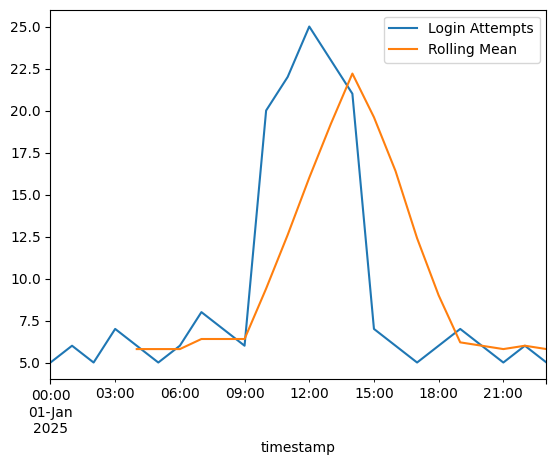

In [4]:
# Simulated time series of login attempts per hour:
data = {
    'timestamp': pd.date_range(start='2025-01-01', periods=24, freq='H'),
    'login_attempts': [5, 6, 5, 7, 6, 5, 6, 8, 7, 6, 20, 22, 25, 23, 21, 7, 6, 5, 6, 7, 6, 5, 6, 5]
}

df = pd.DataFrame(data)
df.set_index('timestamp', inplace=True)

# Calculating rolling mean and standard deviation:
window = 5
df['rolling_mean'] = df['login_attempts'].rolling(window).mean()
df['rolling_std'] = df['login_attempts'].rolling(window).std()

# Simple anomaly rule: value deviates more than 2 std from rolling mean:
df['anomaly'] = (
    (df['login_attempts'] > df['rolling_mean'] + 2 * df['rolling_std']) |
    (df['login_attempts'] < df['rolling_mean'] - 2 * df['rolling_std'])
)

print(df[df['anomaly']])

# Optional visualization:
df['login_attempts'].plot(label='Login Attempts')
df['rolling_mean'].plot(label='Rolling Mean')
plt.legend()
plt.show()
